# import python libs

In [3]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


Connect to db

In [4]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [5]:
cur=conn.cursor()

# Q1

In [6]:
sql_stat = """
    select * from gp8.student
    
"""

In [7]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,s_email,s_name,major
0,rendlr@dukes.jmu.edu,lauryn renda,intel
1,fairtb@dukes.jmu.edu,tim fairbanks,buisness
2,labcr@dukes.jmu.edu,chris labelle,sports man
3,lucge@dukes.jmu.edu,gianna lucchesi,psychology


# Q2

In [8]:
sql_q2 = """
    select gp8.professor.p_name,
    gp8.course.c_name
    from gp8.professor
    inner join gp8.course
    on gp8.professor.p_email = gp8.course.p_email
"""

In [9]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,xxuebin wei,data mining
1,noel hendrickson,futures exploration
2,tim walton,causal analysis\n
3,Orlandrew Danzell,national security intelligence
4,Orlandrew Danzell,seminar on issues in intelligence


# Q3

In [10]:
sql_q3 = """ 
    select c_number,
    count(c_number) as enrolled
    from gp8.enroll_list
    group by c_number
    order by enrolled desc
"""

<AxesSubplot:xlabel='c_number'>

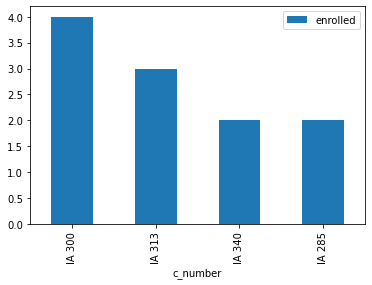

In [11]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

# Q4

In [12]:
sql_q4 = """ 
    select gp8.professor.p_name,
    count(gp8.course.c_name) as teaching_number
    from gp8.professor
    inner join gp8.course
    on gp8.professor.p_email = gp8.course.p_email
    group by professor.p_name
    order by teaching_number desc
"""

<AxesSubplot:xlabel='p_name'>

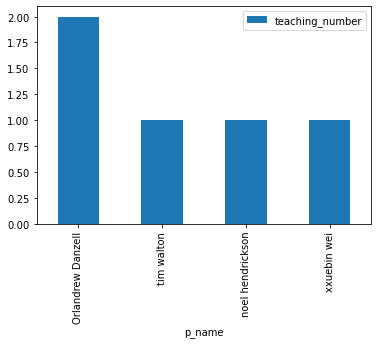

In [13]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

# Q5

In [17]:
q5_insert_professor_sql = """
            insert into gp8.professor(p_email,p_name,p_office)
            values('{}','{}','{}')
            """.format('krenda@jmu.edu','Kelli Renda','engeo40')
print(q5_insert_professor_sql)


            insert into gp8.professor(p_email,p_name,p_office)
            values('krenda@jmu.edu','Kelli Renda','engeo40')
            


In [18]:
cur.execute(q5_insert_professor_sql)


In [19]:
conn.commit()

In [20]:
df=pandas.read_sql_query('select * from gp8.professor',conn)
df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu\n,noel hendrickson,None
1,marrinsp@jmu.edu,stephen marrin,engeo 2104
2,waltontr@jmu.edu\n,tim walton,isat 326
3,weixxuebin@jmu.edu,xxuebin wei,engeo 112
4,danzo@jmu.edu,Orlandrew Danzell,ENGEO 2201
5,krob@jmu.edu,Kim Robinson,engeo 2125
6,krobin@jmu.edu,Kim Robinson,engeo 2125
7,jtang@jmu.edu,Jeff Tang,engeo 2225
8,krenda@jmu.edu,Kelli Renda,engeo40


In [21]:
q5_insert_course_sql = """
            insert into gp8.course(c_number,c_name,c_room,p_email)
            values('{}','{}','{}','{}')
            """.format('IA244','LE Intel','ISAT340','krenda@jmu.edu')
print(q5_insert_course_sql)


            insert into gp8.course(c_number,c_name,c_room,p_email)
            values('IA244','LE Intel','ISAT340','krenda@jmu.edu')
            


In [22]:
cur.execute(q5_insert_course_sql)

In [23]:
conn.commit()

In [24]:
df=pandas.read_sql_query('select * from gp8.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,IA 340,data mining,isat 336,weixxuebin@jmu.edu
1,IA 313,futures exploration,engeo 1204,hendrinx@jmu.edu\n
2,IA 285,causal analysis\n,online,waltontr@jmu.edu\n
3,IA 250,national security intelligence,ENGEO 2201,danzo@jmu.edu
4,IA 300,seminar on issues in intelligence,ISAT 150,danzo@jmu.edu
5,IA244,LE Intel,ISAT340,krenda@jmu.edu


In [25]:
q6_update_course_sql ="""
                    update gp8.course
                    set p_email = '{}'
                    where p_email ='{}'
                    """.format('krenda@jmu.edu','danzo@jmu.edu')

In [26]:
cur.execute(q6_update_course_sql)

In [27]:
conn.commit()

In [28]:
df=pandas.read_sql_query('select * from gp8.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,IA 340,data mining,isat 336,weixxuebin@jmu.edu
1,IA 313,futures exploration,engeo 1204,hendrinx@jmu.edu\n
2,IA 285,causal analysis\n,online,waltontr@jmu.edu\n
3,IA244,LE Intel,ISAT340,krenda@jmu.edu
4,IA 250,national security intelligence,ENGEO 2201,krenda@jmu.edu
5,IA 300,seminar on issues in intelligence,ISAT 150,krenda@jmu.edu


In [29]:
q6_delete_professor_sql = """
                            delete from gp8.professor
                            where p_email='{}'
                            """.format('danzo@jmu.edu')

In [30]:
cur.execute(q6_delete_professor_sql)

In [31]:
conn.commit()

In [32]:
df=pandas.read_sql_query('select * from gp8.professor',conn)
df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu\n,noel hendrickson,None
1,marrinsp@jmu.edu,stephen marrin,engeo 2104
2,waltontr@jmu.edu\n,tim walton,isat 326
3,weixxuebin@jmu.edu,xxuebin wei,engeo 112
4,krob@jmu.edu,Kim Robinson,engeo 2125
5,krobin@jmu.edu,Kim Robinson,engeo 2125
6,jtang@jmu.edu,Jeff Tang,engeo 2225
7,krenda@jmu.edu,Kelli Renda,engeo40


In [33]:
cur.close()

In [34]:
conn.close()